In [8]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
import pandas as pd

In [9]:
# Ruta principal donde están las carpetas CPxxxx
BAN_ADNI_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/BrainAgeNeXt/ADNI'
BAN_CP_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/BrainAgeNeXt/CP'
BAN_NCN_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/BrainAgeNeXt/NCN'
BAN_CogConVar_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/BrainAgeNeXt/CogConVar'

DBN_ADNI_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/DeepBrainNet/ADNI'
DBN_CP_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/DeepBrainNet/CP(BET)'
DBN_NCN_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/DeepBrainNet/NCN'
DBN_CogConVar_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/DeepBrainNet/CogConVar'

pyment_ADNI_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/pyment/freesurfer+fsl(ADNI_CN)'
pyment_CP_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/pyment/freesurfer+fslCP'
pyment_NCN_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/pyment/freesurfer+fsl(NCN)'
pyment_CogConVar_preproc= '/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/pyment/freesurfer+fsl(CogConVar)'

In [10]:
def calulate_avg_vox_intensity(nifti_files, bins, range_min, range_max):
    print(f"Found {len(nifti_files)} NIfTI files.")
    hist_sum = np.zeros(bins)
    hist_range= (range_min, range_max)
    for nifti_path in nifti_files:
        img = nib.load(nifti_path)
        data = img.get_fdata()

        # Aplanar y filtrar intensidades
        flattened = data.flatten()
        flattened = flattened[~np.isnan(flattened)]
        flattened = flattened[flattened > 0]  # eliminar fondo

        if len(flattened) == 0:
            continue

        hist, _ = np.histogram(flattened, bins=bins, range=hist_range)
        hist_sum += hist

    # Promediar los histogramas
    hist_avg = hist_sum / len(nifti_files)

    # Eje x del histograma
    bin_edges = np.linspace(range_min, range_max, bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    return hist_avg, bin_edges, bin_centers

In [11]:
#get hist avg and bins
#----------------pyment-------------------
nifti_files_pymentcogconvar = glob(os.path.join(pyment_CogConVar_preproc, '*/mri/cropped.nii.gz'))
hist_avg_pymentcogconvar,bin_edges_pymentcogconvar,bin_centers_pymentcogconvar= calulate_avg_vox_intensity(nifti_files_pymentcogconvar, bins=100, range_min=0, range_max=0.5)
bar_width_pymentcogconvar = (bin_edges_pymentcogconvar[1] - bin_edges_pymentcogconvar[0]) * 0.8  # Reduce the width to make bars thinner

nifti_files_pymentcp = glob(os.path.join(pyment_CP_preproc, '*/mri/cropped.nii.gz'))
hist_avg_pymentcp,bin_edges_pymentcp,bin_centers_pymentcp= calulate_avg_vox_intensity(nifti_files_pymentcp, bins=100, range_min=0, range_max=0.5)

nifti_files_pymentncn = glob(os.path.join(pyment_NCN_preproc, '*/mri/cropped.nii.gz'))
hist_avg_pymentncn,bin_edges_pymentncn,bin_centers_pymentncn= calulate_avg_vox_intensity(nifti_files_pymentncn, bins=100, range_min=0, range_max=0.5)

nifti_files_pymentadni = glob(os.path.join(pyment_ADNI_preproc, '*/mri/cropped.nii.gz'))
hist_avg_pymentadni,bin_edges_pymentadni,bin_centers_pymentadni= calulate_avg_vox_intensity(nifti_files_pymentadni, bins=100, range_min=0, range_max=0.5)

Found 158 NIfTI files.
Found 202 NIfTI files.
Found 136 NIfTI files.
Found 536 NIfTI files.


In [16]:
#-----------------BAN---------------------
nifti_files_bancp=glob(os.path.join(BAN_CP_preproc,'*.nii.gz'))
hist_avg_bancp,bin_edges_bancp,bin_centers_bancp= calulate_avg_vox_intensity(nifti_files_bancp,bins=200, range_min=0, range_max=500)
bar_width_ban = (bin_edges_bancp[1] - bin_edges_bancp[0]) * 0.8  # Reduce the width to make bars thinner

nifti_files_banncn=glob(os.path.join(BAN_NCN_preproc,'*.nii.gz'))
hist_avg_banncn,bin_edges_banncn,bin_centers_banncn= calulate_avg_vox_intensity(nifti_files_banncn,bins=200, range_min=0, range_max=500)

nifti_files_bancogconvar=glob(os.path.join(BAN_CogConVar_preproc,'*.nii.gz'))
hist_avg_bancogconvar,bin_edges_bancogconvar,bin_centers_bancogconvar= calulate_avg_vox_intensity(nifti_files_bancogconvar,bins=200, range_min=0, range_max=500)

nifti_files_banadni=glob(os.path.join(BAN_ADNI_preproc,'*.nii.gz'))
hist_avg_banadni,bin_edges_banadni,bin_centers_banadni= calulate_avg_vox_intensity(nifti_files_banadni,bins=300, range_min=0, range_max=1000)

Found 207 NIfTI files.
Found 136 NIfTI files.
Found 158 NIfTI files.
Found 1210 NIfTI files.


In [17]:
#-----------------DBN---------------------
nifti_files_dbncp=glob(os.path.join(DBN_CP_preproc,'*.nii.gz'))
hist_avg_dbncp,bin_edges_dbncp,bin_centers_dbncp= calulate_avg_vox_intensity(nifti_files_dbncp,bins=200, range_min=0, range_max=500)

nifti_files_dbnncn=glob(os.path.join(DBN_NCN_preproc,'*.nii.gz'))
hist_avg_dbnncn,bin_edges_dbnncn,bin_centers_dbnncn= calulate_avg_vox_intensity(nifti_files_dbnncn,bins=200, range_min=0, range_max=500)

nifti_files_dbncogconvar=glob(os.path.join(DBN_CogConVar_preproc,'*.nii.gz'))
hist_avg_dbncogconvar,bin_edges_dbncogconvar,bin_centers_dbncogconvar= calulate_avg_vox_intensity(nifti_files_dbncogconvar,bins=200, range_min=0, range_max=500)

nifti_files_dbnadni=glob(os.path.join(DBN_ADNI_preproc,'*.nii.gz'))
hist_avg_dbnadni,bin_edges_dbnadni,bin_centers_dbnadni= calulate_avg_vox_intensity(nifti_files_dbnadni,bins=300, range_min=0, range_max=1000)

Found 207 NIfTI files.
Found 136 NIfTI files.
Found 158 NIfTI files.
Found 1210 NIfTI files.


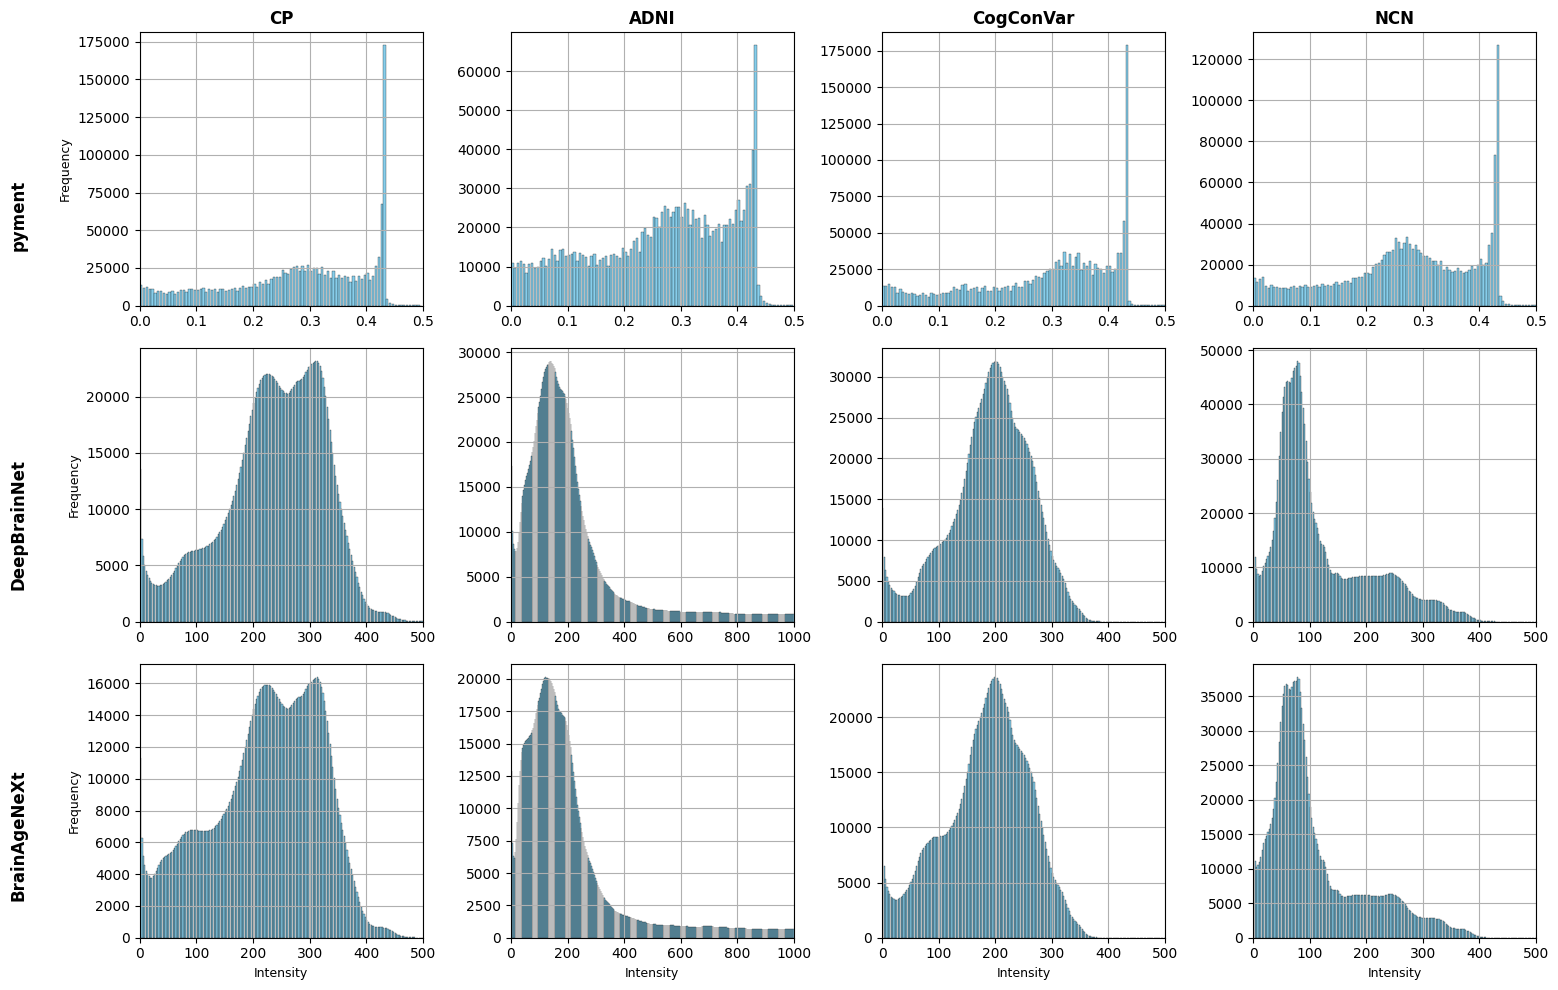

In [18]:
hist_avg_list = [hist_avg_pymentcp,hist_avg_pymentadni,hist_avg_pymentcogconvar,hist_avg_pymentncn,hist_avg_dbncp,hist_avg_dbnadni,hist_avg_dbncogconvar,hist_avg_dbnncn,hist_avg_bancp,hist_avg_banadni,hist_avg_bancogconvar,hist_avg_banncn]
bin_centers_list = [bin_centers_pymentcp,bin_centers_pymentadni,bin_centers_pymentcogconvar,bin_centers_pymentncn,bin_centers_dbncp,bin_centers_dbnadni,bin_centers_dbncogconvar,bin_centers_dbnncn,bin_centers_bancp,bin_centers_banadni,bin_centers_bancogconvar,bin_centers_banncn]
titles = ['pymentcp', 'pymentadni','pymentcogconvar','pymentncn','dbncp','dbnadni','dbncogconvar','dbnncn','bancp','banadni','bancogconvar','banncn']
row_labels = ['pyment', 'DeepBrainNet', 'BrainAgeNeXt']
col_labels = ['CP', 'ADNI', 'CogConVar', 'NCN']

row_labels = ['pyment', 'DeepBrainNet', 'BrainAgeNeXt']
col_labels = ['CP', 'ADNI', 'CogConVar', 'NCN']

fig, axs = plt.subplots(3, 4, figsize=(16, 10))
axs = axs.reshape(3, 4)  # Mantener forma 2D para acceder por fila/columna

for row in range(3):
    for col in range(4):
        idx = row * 4 + col
        ax = axs[row, col]
        if row == 0:
            ax.bar(bin_centers_list[idx], hist_avg_list[idx], width=bar_width_pymentcogconvar, color='skyblue', edgecolor='black', linewidth=0.2)
            ax.set_xlim(0, 0.5)
        else:
            ax.bar(bin_centers_list[idx], hist_avg_list[idx], width=bar_width_ban, color='skyblue', edgecolor='black', linewidth=0.2)
            if col==1:
                ax.set_xlim(0, 1000)
            else:
                ax.set_xlim(0, 500)
        ax.grid(True)
        
        # Etiquetas solo en la primera columna y última fila
        if col == 0:
            ax.set_ylabel('Frequency', fontsize=9)
        if row == 2:
            ax.set_xlabel('Intensity', fontsize=9)
        
        # Título personalizado interno si querés mantenerlo (opcional)
        # ax.set_title(titles[idx], fontsize=9)

# Títulos por columna (arriba de la primera fila)
for col in range(4):
    axs[0, col].set_title(col_labels[col], fontsize=12, weight='bold')

# Títulos por fila (como y-labels "invisibles", usando texto fuera del área de gráficos)
for row in range(3):
    fig.text(0.04, 0.78 - row * 0.31, row_labels[row], va='center', ha='right', fontsize=12, weight='bold', rotation='vertical')

plt.tight_layout(rect=[0.05, 0, 1, 1])  # Dejar espacio a la izquierda para los títulos de fila
plt.show()
plt.show()

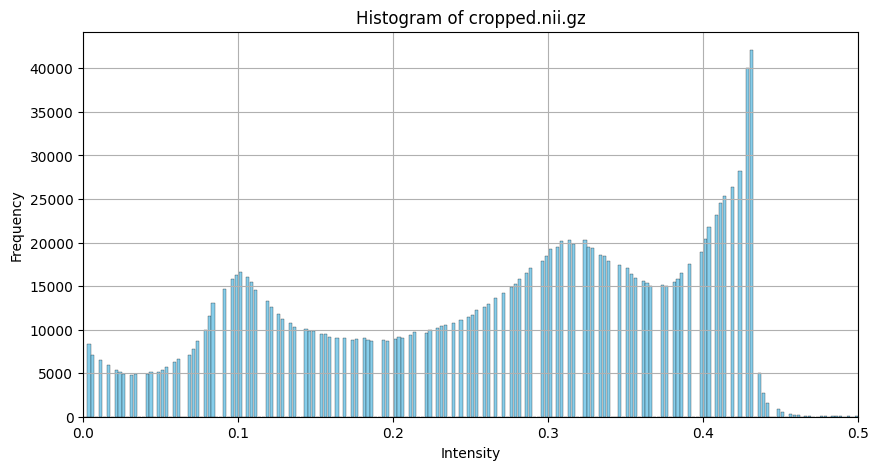

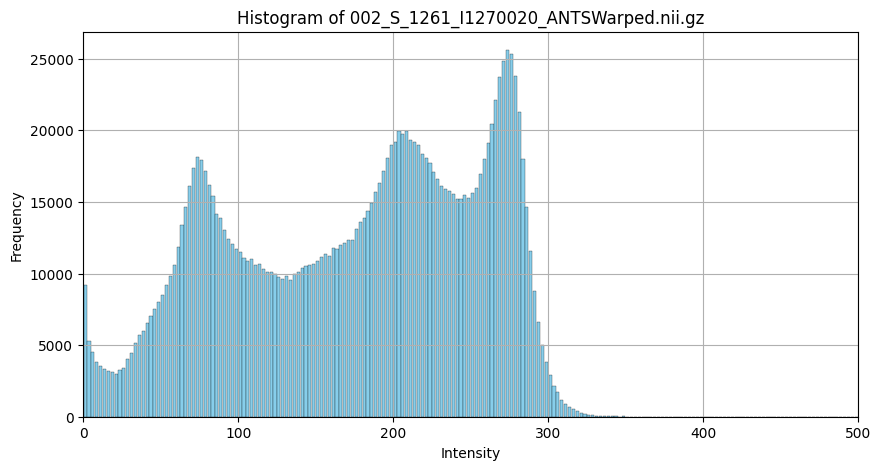

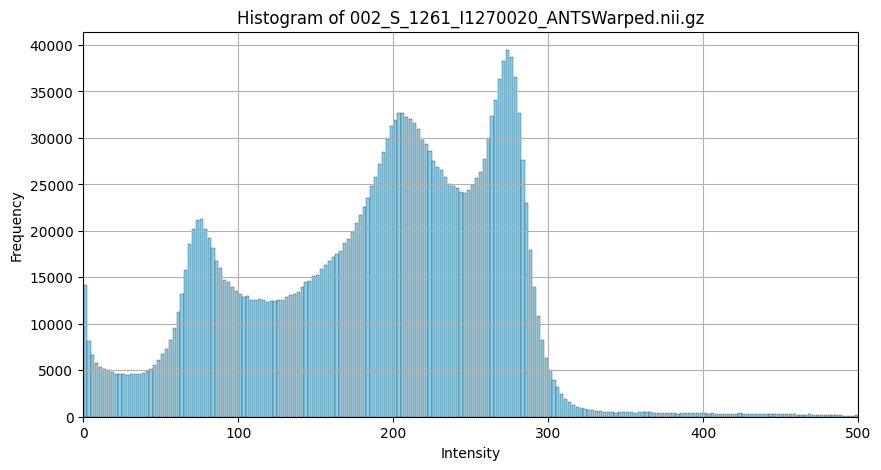

In [15]:
#armando histograma para una sola imagen
def plot_single_histogram(nifti_path, bins=100, range_min=0, range_max=0.5):
    img = nib.load(nifti_path)
    data = img.get_fdata()

    # Aplanar y filtrar intensidades
    flattened = data.flatten()
    flattened = flattened[~np.isnan(flattened)]
    flattened = flattened[flattened > 0]  # eliminar fondo

    if len(flattened) == 0:
        print("No valid data to plot.")
        return

    hist, bin_edges = np.histogram(flattened, bins=bins, range=(range_min, range_max))

    # Eje x del histograma
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.figure(figsize=(10, 5))
    plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]) * 0.8, color='skyblue', edgecolor='black', linewidth=0.2)
    plt.xlim(range_min, range_max)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {os.path.basename(nifti_path)}')
    plt.grid(True)
    plt.show()
# Ejemplo de uso
plot_single_histogram('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/pyment/freesurfer+fsl(ADNI_CN)/002_S_1261_I1270020/mri/cropped.nii.gz', bins=200, range_min=0, range_max=0.5)
plot_single_histogram('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/BrainAgeNeXt/ADNI/002_S_1261_I1270020_ANTSWarped.nii.gz', bins=200, range_min=0, range_max=500)
plot_single_histogram('/data/Lautaro/Documentos/BrainAgeCOVID/DATOS/Preprocessed/DeepBrainNet/ADNI/002_S_1261_I1270020_ANTSWarped.nii.gz', bins=200, range_min=0, range_max=500)